## Importando bibliotecas

In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, Point, LineString, MultiPolygon
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Lendo e entendendo os arquivos

In [2]:
rj_estado = gpd.read_file("../GeoPandas/mapas/RJ-ESTADO/33MUE250GC_SIR.shp")
rj_estado

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."
...,...,...,...,...
87,1555,3306008,TRÊS RIOS,"POLYGON ((-43.13666 -22.10933, -43.13182 -22.1..."
88,1556,3306107,VALENÇA,"POLYGON ((-43.82120 -22.08844, -43.82101 -22.0..."
89,1557,3306156,VARRE-SAI,"POLYGON ((-41.82695 -20.84164, -41.82686 -20.8..."
90,1558,3306206,VASSOURAS,"POLYGON ((-43.61208 -22.30841, -43.61113 -22.3..."


In [3]:
type(rj_estado)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

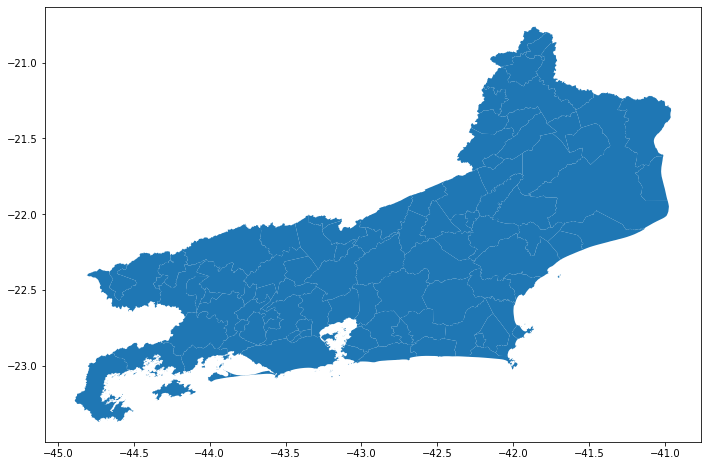

In [4]:
rj_estado.plot(figsize=(15,8))

## Entendendo funcionamento do Geometry

<AxesSubplot:>

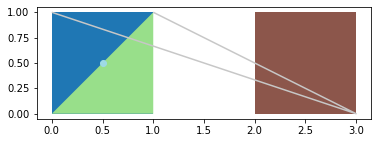

In [5]:
p1 = Polygon([(0,0), (1,0), (1,1), (0,1)])
p2 = Polygon([(0,0), (1,0), (1,1)])
p3 = Polygon([(2,0), (3,0), (3,1), (2,1)])
p4 = LineString([(0,1), (3,0), (1,1)])
p5 = Point(0.5, 0.5)

g = gpd.GeoSeries([p1,p2, p3, p4, p5])
g.plot(cmap="tab20")

In [6]:
dir = "../GeoPandas - GeoPandas Parte 1/mapas/RJ-MUNIC"
if not os.path.exists(dir):
    os.makedirs(dir)

In [7]:
rj_munic = rj_estado[rj_estado["NM_MUNICIP"] == "RIO DE JANEIRO"]
rj_munic.to_file("../GeoPandas - GeoPandas Parte 1/mapas/RJ-MUNIC/rj_munic.shp")
#selecionando da base de dados, apenas os dados que são do município do rio de janeiro

In [8]:
rj_munic = gpd.read_file("../GeoPandas - GeoPandas Parte 1/mapas/RJ-MUNIC/rj_munic.shp")
rj_munic

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


<AxesSubplot:>

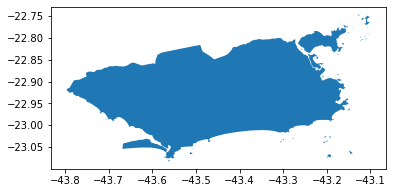

In [9]:
rj_munic.plot()

In [10]:
dados = pd.read_table("dados_de_vendas.txt")
dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000


In [11]:
geometry = [Point(x) for x in zip(dados.Longitude, dados.Latitude)]
#criando um objeto iterável a partir dos dados de latitude e longitude e iterando sobre eles parar gerar uma lista de "points" do geometry.

<AxesSubplot:>

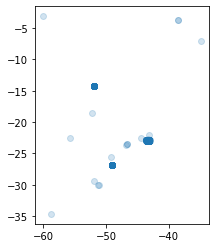

In [12]:
crs = {'proj':'latlong', 'ellps': 'WGS84','datum': 'WGS84', 'no_defs': True}
#site para encontrar o crs: https://spatialreference.org/
geo_dados = gpd.GeoDataFrame(dados, crs = crs, geometry = geometry)
geo_dados.plot(alpha=0.2)

In [13]:
rj_munic.crs

{'init': 'epsg:4674'}

In [14]:
rj_munic = rj_munic.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs")
rj_munic.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

In [15]:
geo_dados.crs

{'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

In [16]:
geo_dados = geo_dados.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs")
geo_dados.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

<AxesSubplot:>

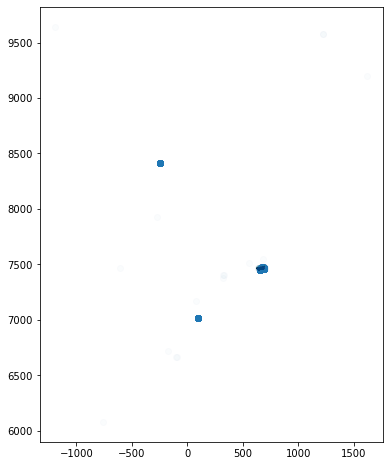

In [17]:
base = rj_munic.plot(color="black", edgecolor="black", figsize=(15,8))
geo_dados.plot(ax=base, figsize=(15,8), alpha=0.02)

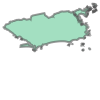

In [18]:
rj_munic.iloc[0].geometry

In [19]:
geo_dados[geo_dados["geometry"].within(rj_munic.iloc[0].geometry)]

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284)
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216)
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944)
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848)
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417)


In [20]:
antes = geo_dados.shape[0]
antes

5000

In [21]:
geo_dados = geo_dados[geo_dados["geometry"].within(rj_munic.iloc[0].geometry)]
depois = geo_dados.shape[0]
depois

4513

<AxesSubplot:>

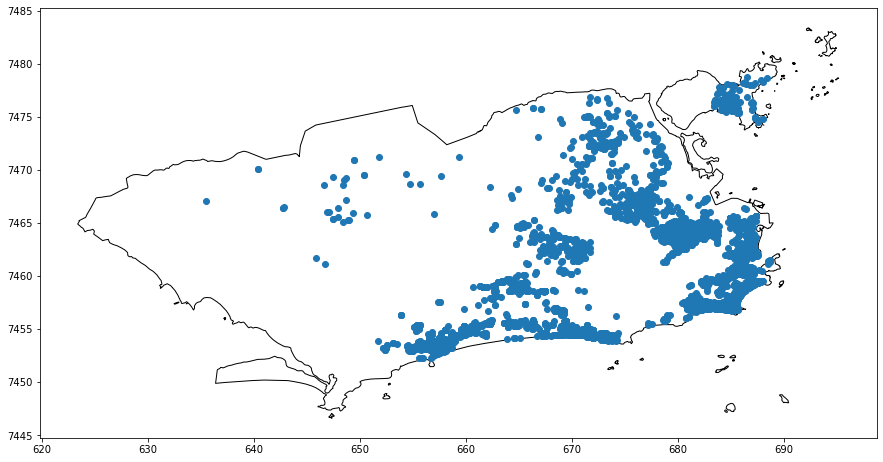

In [22]:
base = rj_munic.plot(color="white", edgecolor="black", figsize=(15,8))
geo_dados.plot(ax=base, figsize=(15,8), alpha=1)

In [23]:
geo_dados.to_file("../GeoPandas - GeoPandas Parte 1/mapas/RJ-MUNIC/dataset.shp")
geodados = gpd.read_file("../GeoPandas - GeoPandas Parte 1/mapas/RJ-MUNIC/dataset.shp")

In [24]:
geodados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284)
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216)
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944)
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848)
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417)


## Referências

In [26]:
metro = gpd.read_file("dados/estacoes_metro_rj.geojson")

In [ ]:
metro

In [ ]:
metro.crs

In [ ]:
metro = metro.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs")
metro.crs

In [ ]:
base = rj_munic.plot(color="white", edgecolor="black", figsize=(15,8))
geo_dados.plot(ax=base,color= "orange", alpha=0.2)
metro.plot(ax=base,color= "black", markersize=50)

In [ ]:
geodados.iloc[0].geometry

In [ ]:
distancias = metro.distance(geodados.iloc[0].geometry)

In [ ]:
type(distancias)

In [ ]:
distancias

In [ ]:
min(distancias)

In [ ]:
geodados["dist_metro"] = geodados["geometry"].apply(lambda x: metro.distance(x).min())

In [ ]:
geodados.head()

In [ ]:
geodados.corr()

In [ ]:
estações_brt = gpd.read_file("https://opendata.arcgis.com/datasets/f753941f44a749d4987f1111aa6486b3_22.geojson")

In [ ]:
trem = gpd.read_file("https://opendata.arcgis.com/datasets/8c9f264be1e946b1b49cf4c198bd5e46_16.geojson")

In [ ]:
trem

In [ ]:
trem.crs

In [ ]:
trem = trem.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs")
trem.crs

In [ ]:
base = rj_munic.plot(color="white", edgecolor="black", figsize=(15,8))
geo_dados.plot(ax=base,color= "orange", alpha=0.2)
metro.plot(ax=base,color= "black", markersize=50)
trem.plot(ax=base, color="red", markersize=50)

In [ ]:
trem = trem[trem.within(rj_munic.iloc[0].geometry)]

In [ ]:
base = rj_munic.plot(color="white", edgecolor="black", figsize=(15,8))
geo_dados.plot(ax=base,color= "black", alpha=0.2)
metro.plot(ax=base,color= "orange", markersize=50)
trem.plot(ax=base, color="red", markersize=50)

In [ ]:
estações_brt

In [ ]:
estações_brt.crs

In [ ]:
estações_brt = estações_brt.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs")
estações_brt.crs

In [ ]:
estações_brt = estações_brt[estações_brt.within(rj_munic.iloc[0].geometry)]

In [ ]:
base = rj_munic.plot(color="white", edgecolor="black", figsize=(15,8))
geo_dados.plot(ax=base,color= "black", alpha=0.2)
metro.plot(ax=base,color= "orange", markersize=50)
trem.plot(ax=base, color="red", markersize=50)
estações_brt.plot(ax=base, color="yellow", markersize=50)

In [ ]:
transporte = pd.concat([trem.geometry, metro.geometry, estações_brt.geometry], ignore_index = True)

In [ ]:
transporte

In [ ]:
geodados["Dist_transporte"] = geodados["geometry"].apply(lambda x: transporte.distance(x).min())

In [ ]:
geodados

In [ ]:
geodados.corr()

In [ ]:
area_rj = gpd.read_file("https://opendata.arcgis.com/datasets/a22768dc645043f5bdfd1affab888ded_0.geojson")

In [ ]:
area_rj

In [ ]:
area_rj = area_rj.to_crs("+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs")
area_rj.crs

In [ ]:
area_rj.plot(color="red")

In [ ]:
area_rj["legenda"].value_counts()

In [ ]:
praias = area_rj[area_rj["legenda"] == "Praia"]

In [ ]:
praias

In [ ]:
geodados["Dist_praia"] = geodados["geometry"].apply(lambda x: praias.distance(x).min())

In [ ]:
geodados.corr()